In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, BayesianRidge

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
'''
Grayscale Pixel Values as Features
'''

image = x_train[0]
features = np.reshape(image, (1*784))
print('\n\nShape of the feature array = ',features.shape)



Shape of the feature array =  (784,)


In [4]:
'''
We can see here that the pixel matrix clearly forms the number zero
The actual image is shown in the next cell
'''

for i in x_train[1]:
    for j in i:
        print (j,end=" ")
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 51 159 253 159 50 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 48 238 252 252 252 237 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 54 227 253 252 239 233 252 57 6 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 10 60 224 252 253 252 202 84 252 253 122 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 163 252 252 252 253 252 252 96 189 253 167 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 51 238 253 253 190 114 253 228 47 79 255 168 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 48 238 252 252 179 12 75 121 21 0 0 253 243 50 0 0 0 0 0 
0 0 0 0 0 0 0 0 38 165 253 233 208 84 0 0 0 0 0 0 253 252 165 0 0 0 0 0 
0 0 0 0 0 0 0 7 178 252 240 71 19 28 0 0 0 0 0 0 253 252 195 0 0 0 0 0 
0 0 0 0 0 0 0 57 252 252 63 0 0 0 0 0 0 0 0 0 253 252 195 0 0 0 0 0 
0 0 0 0 0 0 0 198 253 190 0 0 0 0 0 0 0 0 0 0 

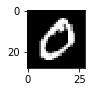

In [5]:
plt.subplot(1, 5, 1)
plt.imshow(np.reshape(x_train[1], (28,28)), cmap=plt.cm.gray)

In [6]:
extracted_features = []
for i in x_train:
    extracted_features.append(np.reshape(i,(784)))
extracted_features = np.array(extracted_features)

In [7]:
lr = LogisticRegression(C=50. / 60000, penalty='elasticnet', solver='saga', tol=0.1, l1_ratio=0.5, multi_class='multinomial')
lr.fit(extracted_features, y_train)

LogisticRegression(C=0.0008333333333333334, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.5,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.1, verbose=0, warm_start=False)

In [8]:
ex_test = []
for i in x_test:
    ex_test.append(np.reshape(i,(784)))
ex_test = np.array(ex_test)

In [9]:
pred = lr.predict(ex_test)

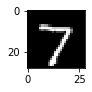

In [10]:
plt.subplot(1, 5, 1)
plt.imshow(np.reshape(x_test[0], (28,28)), cmap=plt.cm.gray)

In [11]:
score = lr.score(ex_test, y_test)
print(score)

0.9238
